In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 37.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# Run this cell to mount your Google Drive. 
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

customCNN.ipynb  fruits-360


In [ ]:
#importing al needed librabries to be used for training

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from pathlib import Path
import os.path
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras
import tensorflow.keras.utils
from tensorflow.keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_files
import matplotlib.image as mpimg

print("Ran successfully!!!") # used this print to display a text to confirm that all imports work correctly

Ran successfully!!!


(100, 100, 3)


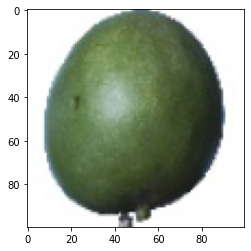

In [ ]:

img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/fruits-360/Training/Mango/100_100.jpg')
print(img.shape)
plt.imshow(img)


(100, 100, 3)


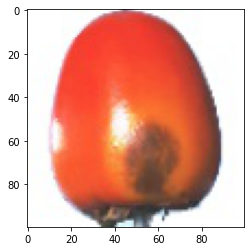

In [ ]:
# Trying to access fruit image data from another folder to confirm it is also accessible.  
img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/fruits-360/Training/Kaki/84_100.jpg')
print(img.shape)
plt.imshow(img)

In [ ]:
# Testing to confrim the Total number of Training and Test data available and also number of possible classes.
# Create a list with the filepaths for training and testing
train_dir = Path('/content/drive/My Drive/Colab Notebooks/fruits-360/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/drive/My Drive/Colab Notebooks/fruits-360/Test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))


def proc_img(filepath):
    #Create a DataFrame with the filepath and the labels of the pictures

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)

arr = []
arr = train_df.Label.unique()
print(np.sort(arr))

print(f'Number of Fruits in train images: {train_df.shape[0]}\n')
print(f'Number of Fruits in Test images: {test_df.shape[0]}\n')
print(f'Number of All Fruits images: {train_df.shape[0]+test_df.shape[0]}\n')
print(f'Number of different Fruits labels: {len(train_df.Label.unique())}\n')
print(f'All Fruits Labels: {train_df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(131)

['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'
 'Mangostan' 'Maracuja' 'Melon Piel de Sapo' 'Mulberry' 'Nectarine'
 'Nectarine Flat

,Filepath,Label
0,/content/drive/My Drive/Colab Notebooks/fruits...,Apple Pink Lady
1,/content/drive/My Drive/Colab Notebooks/fruits...,Cherry Wax Black
2,/content/drive/My Drive/Colab Notebooks/fruits...,Pear Abate
3,/content/drive/My Drive/Colab Notebooks/fruits...,Mandarine
4,/content/drive/My Drive/Colab Notebooks/fruits...,Melon Piel de Sapo
...,...,...
126,/content/drive/My Drive/Colab Notebooks/fruits...,Pear Monster
127,/content/drive/My Drive/Colab Notebooks/fruits...,Grapefruit Pink
128,/content/drive/My Drive/Colab Notebooks/fruits...,Apple Braeburn
129,/content/drive/My Drive/Colab Notebooks/fruits...,Pear Williams


In [ ]:
#Loading the data into arrays and confirming the numbers are still intact
train_categories = [] #train categories/classes
train_samples = [] #train samples array 
for i in os.listdir('/content/drive/My Drive/Colab Notebooks/fruits-360/Test/'):
    train_categories.append(i)
    train_samples.append(len(os.listdir('/content/drive/My Drive/Colab Notebooks/fruits-360/Training/'+ i)))

test_categories = [] #test categories/classes
test_samples = [] #test samples array 
for i in os.listdir('/content/drive/My Drive/Colab Notebooks/fruits-360/Test/'):
    test_categories.append(i)
    test_samples.append(len(os.listdir('/content/drive/My Drive/Colab Notebooks/fruits-360/Test/'+ i)))


print("Total number of Fruits Classes", len(train_categories))
print("Total number of Fruits in Training set:", sum(train_samples))
print("Total number of Fruits in Set set:", sum(test_samples))

Total number of Fruits Classes 131
Total number of Fruits in Training set: 67762
Total number of Fruits in Set set: 22688


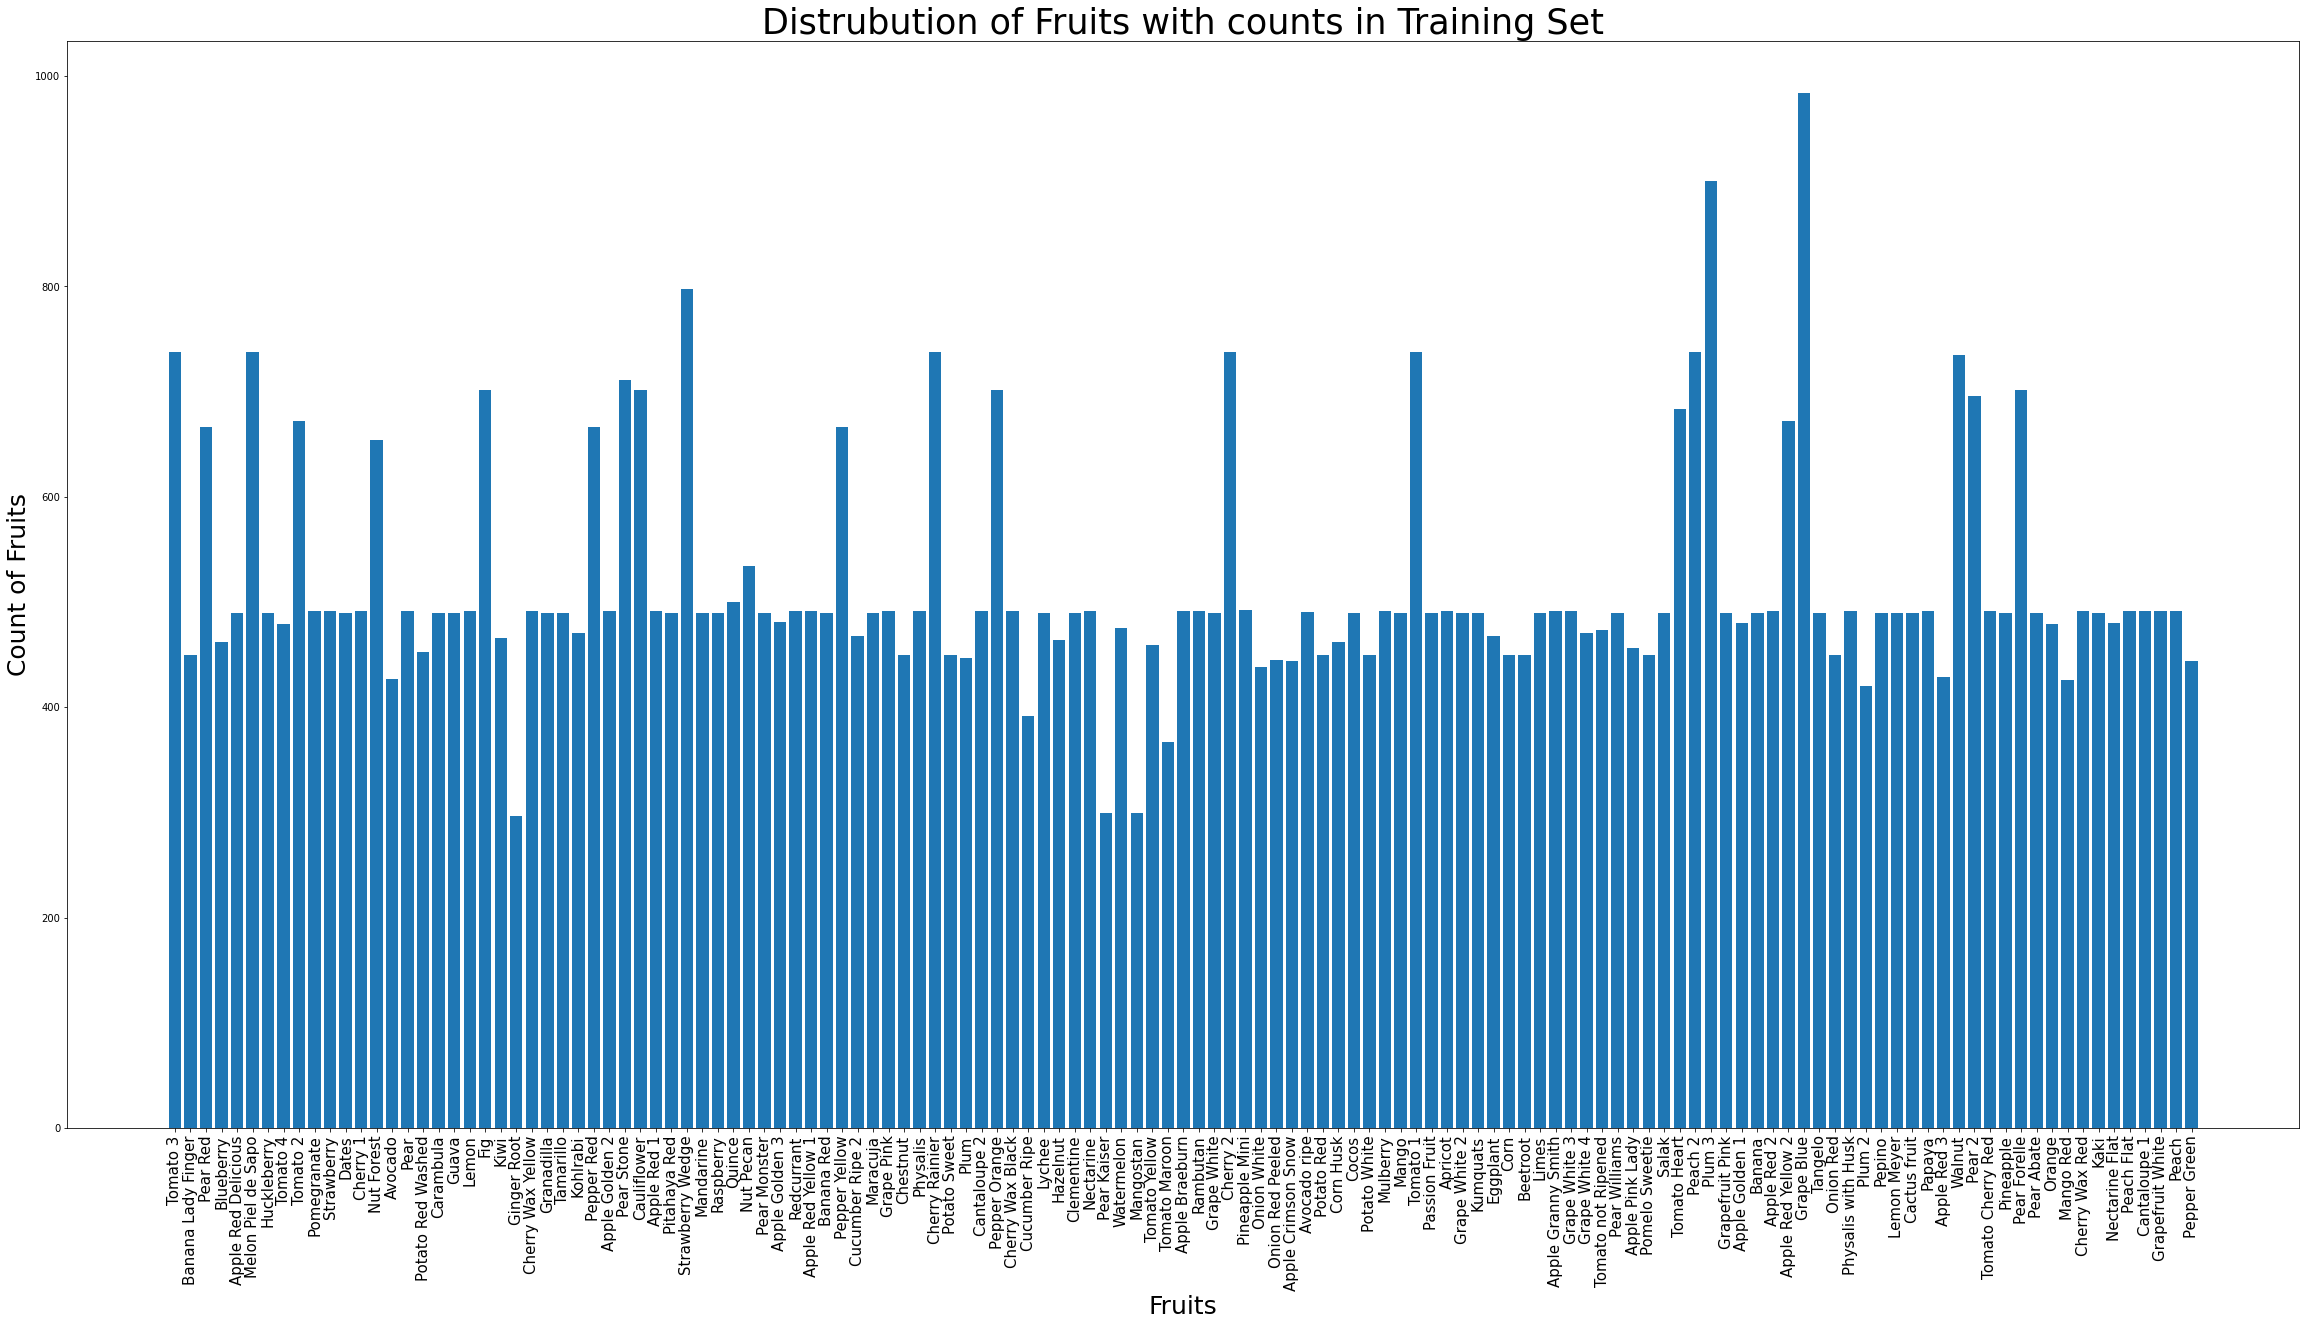

In [ ]:
#Display how the distribution of samples are accross all classes
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show()

In [ ]:
train_dir = '/content/drive/My Drive/Colab Notebooks/fruits-360/Training/'
test_dir = '/content/drive/My Drive/Colab Notebooks/fruits-360/Test/'

def load_dataset(data_path):
    data_loading = load_files(data_path)
    files_add = np.array(data_loading['filenames'])
    targets_fruits = np.array(data_loading['target'])
    target_labels_fruits = np.array(data_loading['target_names'])
    return files_add,targets_fruits,target_labels_fruits
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

# New section

In [ ]:
# Display of number of Total classes
no_of_classes = len(np.unique(y_train))
no_of_classes

131

In [ ]:
#Display of array to confirm the class the first training sample belongs to.
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Creating a Validation set from the Test set
x_test,x_valid = x_test[11400:],x_test[:11400]
y_test,y_vaild = y_test[11400:],y_test[:11400]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (11400,)
Vaildation y : (11400, 131)
Test X :  (11288,)
Test y :  (11288, 131)


In [ ]:
#matrix display of first training data, It is 255 neurons  
def convert_image_to_array_form(files):
    images_array=[]
    for file in files:
        images_array.append(img_to_array(load_img(file)))
    return images_array

x_train = np.array(convert_image_to_array_form(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array_form(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array_form(x_test))
# print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

print('1st training image as array',x_train[0]) 
# there are elements will other values too :p

Training set shape :  (67762, 100, 100, 3)
Validation set shape :  (11400, 100, 100, 3)
1st training image shape  (100, 100, 3)
1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [ ]:
#Divining the 255 size to make the max size "1"
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255


print('1st training image as array',x_train[0]) 

print("finished")

1st training image as array [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
finished


In [ ]:
#Model Creation

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation="relu"))
# model.add(Dense(256,activation="relu"))
model.add(Dense(131,activation="softmax"))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy']) 

print("finished")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 128)     

In [ ]:
# Training the model, where the main work is.
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, shuffle=True)

Epoch 1/10
2118/2118 - 214s - loss: 0.0996 - accuracy: 0.9935 - val_loss: 1.1229 - val_accuracy: 0.9638 - 214s/epoch - 101ms/step
Epoch 2/10
2118/2118 - 213s - loss: 0.1084 - accuracy: 0.9938 - val_loss: 1.5005 - val_accuracy: 0.9666 - 213s/epoch - 100ms/step
Epoch 3/10
2118/2118 - 216s - loss: 0.1349 - accuracy: 0.9933 - val_loss: 1.2342 - val_accuracy: 0.9625 - 216s/epoch - 102ms/step
Epoch 4/10
2118/2118 - 214s - loss: 0.1306 - accuracy: 0.9946 - val_loss: 2.0707 - val_accuracy: 0.9677 - 214s/epoch - 101ms/step
Epoch 5/10
2118/2118 - 214s - loss: 0.1471 - accuracy: 0.9951 - val_loss: 2.2379 - val_accuracy: 0.9646 - 214s/epoch - 101ms/step
Epoch 6/10
2118/2118 - 222s - loss: 0.1985 - accuracy: 0.9947 - val_loss: 3.3457 - val_accuracy: 0.9695 - 222s/epoch - 105ms/step
Epoch 7/10
2118/2118 - 220s - loss: 0.2006 - accuracy: 0.9959 - val_loss: 3.4579 - val_accuracy: 0.9711 - 220s/epoch - 104ms/step
Epoch 8/10
2118/2118 - 213s - loss: 0.2298 - accuracy: 0.9955 - val_loss: 2.9807 - val_acc

In [ ]:
#evaluate and print test accuracy
test_eval = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', test_eval[0]) # display average Test loss 
print('\n', 'Test accuracy:', test_eval[1]) # Display Test Accuracy
print('\n', 'Test accuracy:', format((test_eval[1] *100), '.2f') +"%") # Display Test Accuracy percentage

Test loss: 3.8486781120300293

 Test accuracy: 0.9731573462486267

 Test accuracy: 97.32%


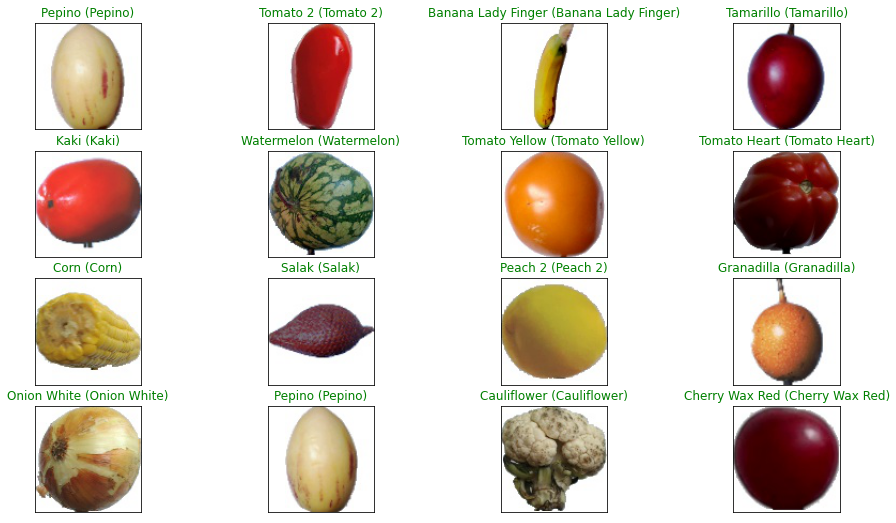

In [ ]:
# Visualizing Predictions at random

y_pred = model.predict(x_test)

# # pred_final = np.where(y_pred>0.5,1,0)
# # print(pred_final)

# # Predict the label of the test_images
# y_pred = np.argmax(y_pred,axis=1)

# # Map the label
# labels = (target_labels)
# labels = dict((v,k) for k,v in labels)
# pred = [labels[k] for k in y_pred]

# # Display the result
# print(f'The first 5 predictions: {pred[:5]}')

# from sklearn.metrics import classification_report
# class_report = classification_report(y_test, pred, zero_division=1)
# print(class_report)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

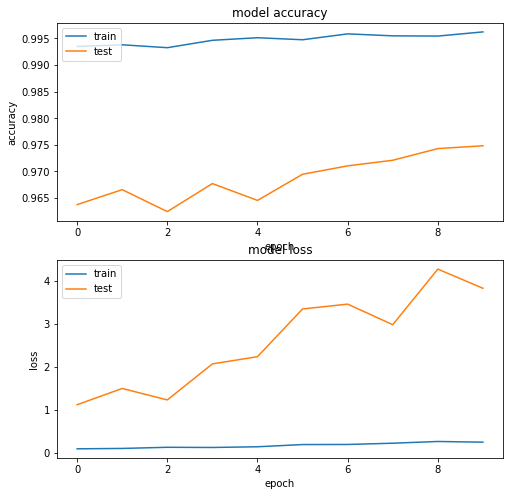

In [ ]:
#Finally lets visualize the loss and accuracy wrt epochs
#summarize history for accuracy  
   
plt.figure(figsize=(8, 8))
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.subplot(212)  

#summary history for loss  
   
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [ ]:
# save model and architecture to single file
model.save("customCNNmodel.h5")
print("Saved model to disk")

Saved model to disk
